In [ ]:
#utilities
import re
import numpy as np
import pandas as pd
#plottingz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/ML Project"

/content/drive/MyDrive/ML Project



Selecting random 10000 tweets from dataset

In [ ]:
import pandas
import random

filename = "training.csv"
n = sum(1 for line in open(filename, encoding = 'Latin-1')) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pandas.read_csv(filename, skiprows=skip,encoding = 'Latin-1',names=('target','id','date','flag','username','tweet'))

In [ ]:
df

,target,id,date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467857975,Mon Apr 06 22:32:06 PDT 2009,NO_QUERY,szrhnds602,Borders closed at 10
2,0,1467863508,Mon Apr 06 22:33:32 PDT 2009,NO_QUERY,g_rose86,Kind of longs for the bus that shows up at the...
3,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
4,0,1467965065,Mon Apr 06 23:01:40 PDT 2009,NO_QUERY,hoopdiva,ugh horrible ending to the sandra kantu story ...
...,...,...,...,...,...,...
9996,4,2193155279,Tue Jun 16 08:04:18 PDT 2009,NO_QUERY,lboyle09,NEW JONAS BROTHER CD OUT TODAY!!!
9997,4,2193222712,Tue Jun 16 08:09:49 PDT 2009,NO_QUERY,caspercornelius,just got my invoice from @hyperisland. 9925â¬...
9998,4,2193223992,Tue Jun 16 08:09:56 PDT 2009,NO_QUERY,CHRISTINE__B,@dsthestar1121 YESSS!!!! THERE IS NO MAN LIKE...
9999,4,2193525604,Tue Jun 16 08:34:35 PDT 2009,NO_QUERY,veganstephen,@Laurake Glad you're digging it dude!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    10001 non-null  int64 
 1   id        10001 non-null  int64 
 2   date      10001 non-null  object
 3   flag      10001 non-null  object
 4   username  10001 non-null  object
 5   tweet     10001 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10001, 6)

In [ ]:
df.tweet

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                                    Borders closed at 10 
2        Kind of longs for the bus that shows up at the...
3                                           @danadearmond 
4        ugh horrible ending to the sandra kantu story ...
                               ...                        
9996                    NEW JONAS BROTHER CD OUT TODAY!!! 
9997     just got my invoice from @hyperisland. 9925â¬...
9998     @dsthestar1121 YESSS!!!!  THERE IS NO MAN LIKE...
9999                @Laurake Glad you're digging it dude! 
10000                                    checking my mail 
Name: tweet, Length: 10001, dtype: object

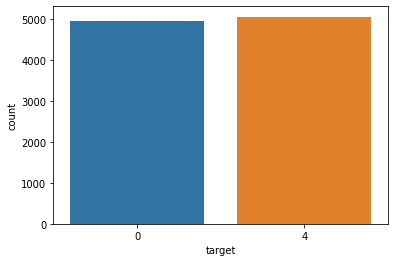

In [ ]:
sns.countplot(x = 'target',data = df) #The dataset is balanced since there are 5000 positive tweets and 5000 negative tweets.

In [ ]:
# dropped columns
df.drop(['id','date','flag','username'], axis=1, inplace=True)

In [ ]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Borders closed at 10
2,0,Kind of longs for the bus that shows up at the...
3,0,@danadearmond
4,0,ugh horrible ending to the sandra kantu story ...


Data Preprocessing 

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves'] 

def preprocess(textdata , wordLemm):
    processedText = []
  
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
           tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        #STOPWORDS = set(stopwordlist)
        #tweet = " " .join([word for word in str(tweet).split() if word not in STOPWORDS])
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
df.tweet  = preprocess(df.tweet , wordLemm)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df.tweet 

0        USER URL aww that bummer you shoulda got david...
1                                     border closed at 10 
2        kind of longs for the bus that show up at the ...
3                                                    USER 
4        ugh horrible ending to the sandra kantu story ...
                               ...                        
9996                       new jonas brother cd out today 
9997     just got my invoice from USER 9925 ouch still ...
9998     USER yes there is no man like my daddy if they...
9999                     USER glad you re digging it dude 
10000                                    checking my mail 
Name: tweet, Length: 10001, dtype: object

In [ ]:

# sklearn
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# converting the 4 in target column to 1 to denote the value 'positive'
df.target = df.target.apply(lambda x: 1 if x==4 else x)

In [ ]:
X = df.tweet
y = df.target

In [ ]:
X

0        USER URL aww that bummer you shoulda got david...
1                                     border closed at 10 
2        kind of longs for the bus that show up at the ...
3                                                    USER 
4        ugh horrible ending to the sandra kantu story ...
                               ...                        
9996                       new jonas brother cd out today 
9997     just got my invoice from USER 9925 ouch still ...
9998     USER yes there is no man like my daddy if they...
9999                     USER glad you re digging it dude 
10000                                    checking my mail 
Name: tweet, Length: 10001, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size = 0.8 , test_size = 0.2 ,random_state=42)
# Used 80% data for training and 20% data for testing

In [ ]:
X_testtbl = X_test

In [ ]:
X_train

1561    omg trying to find where can watch the mtv awa...
1670                                 USER didn have time 
6087    USER have fun thomas and love the addison shir...
6669                       USER you re so optimistic lol 
5933    USER yayayyayayayayaayy lt oi lt it when you s...
                              ...                        
5734    my bet on mumbai indian today anyone to take b...
5191                                     is in bed again 
5390    bridge house last night wa amazing thanks to e...
860     is trying to decide where the hell to put roby...
7270    off to work need to make 500 today doable am n...
Name: tweet, Length: 8000, dtype: object

In [ ]:
#CountVectorizer convert a collection of text documents to a vector of term/token counts
vectoriser = CountVectorizer(ngram_range=(1,3),max_df=0.95, min_df=2,max_features=10000)
count_vectoriser= vectoriser.fit_transform(X_train)
#count_vectoriser= vectoriser.fit_transform(X_train).toarray()
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


No. of feature_words:  10000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


In [ ]:
vectorizer = CountVectorizer()

# Use the content column instead of our single text variable
matrix = vectorizer.fit_transform(X_train)
vectorizer.transform(X_train)
counts = pd.DataFrame(matrix.toarray(),
                  index=X_train,
                  columns=vectorizer.get_feature_names())

counts.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,013th,03,04,0430,0433963407,05am,06,09,0f,...,zippo,zippy,zis,zombie,zone,zonealarm,zoo,zoya,ztecwiz,zz
tweet,,,,,,,,,,,,,,,,,,,,,
omg trying to find where can watch the mtv award online but can find it anywhere,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USER didn have time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USER have fun thomas and love the addison shirt by the way,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USER you re so optimistic lol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USER yayayyayayayayaayy lt oi lt it when you say that tehe gt lt msnn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
counts[['the','metro','is','just','terrible', 'there','are','fast','jet', 'passing','over','my']]

,the,metro,is,just,terrible,there,are,fast,jet,passing,over,my
tweet,,,,,,,,,,,,
omg trying to find where can watch the mtv award online but can find it anywhere,1,0,0,0,0,0,0,0,0,0,0,0
USER didn have time,0,0,0,0,0,0,0,0,0,0,0,0
USER have fun thomas and love the addison shirt by the way,2,0,0,0,0,0,0,0,0,0,0,0
USER you re so optimistic lol,0,0,0,0,0,0,0,0,0,0,0,0
USER yayayyayayayayaayy lt oi lt it when you say that tehe gt lt msnn,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
my bet on mumbai indian today anyone to take bet on this for 500 buck,0,0,0,0,0,0,0,0,0,0,0,1
is in bed again,0,0,1,0,0,0,0,0,0,0,0,0
bridge house last night wa amazing thanks to everyone who came were playing the star tonight hope to see you there,1,0,0,0,0,1,0,0,0,0,0,0


LOGISTIC REGRESSION

In [ ]:
# Hyper parameter tuning for logistic regression 

In [ ]:
logModel = LogisticRegression()
param_grid = [    
    {   
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     
    }
]

        

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1438.44988828766, solver='saga')

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp = 1000
tsvd = TruncatedSVD(n_components = n_comp  , random_state = 42)
X_train = tsvd.fit_transform(X_train)
X_test = tsvd.transform(X_test)


In [ ]:
logistic = LogisticRegression(C =1, max_iter = 1000, solver= 'saga').fit(X_train,y_train)
#testing
y_pred2= logistic.predict(X_test)
print(confusion_matrix(y_pred2,y_test))

[[715 216]
 [283 787]]


In [ ]:
print(classification_report(y_pred2,y_test))
#Got 0.75 accuracy in logistic regression

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       931
           1       0.78      0.74      0.76      1070

    accuracy                           0.75      2001
   macro avg       0.75      0.75      0.75      2001
weighted avg       0.75      0.75      0.75      2001



In [ ]:
# dataframe for test and predicted sentiments (from logistic regression model)
LRtest = pd.DataFrame(list(zip((vectoriser.inverse_transform(X_test)) ,y_pred2, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [ ]:
LRtest

,TEST_TWEETS,PREDICTED,ORIGINAL
0,"[back, back to, good, im, now, now im, state, to]",1,1
1,"[hour, it, it only, maybe, maybe it, new, only...",1,0
2,"[delete, getting, haa, it, know, last, not, wh...",0,0
3,"[cant, cant wait, cant wait to, cd, different,...",1,0
4,"[have, have no, life, lol, no, no life, sadly]",0,0
...,...,...,...
1996,"[but, done, good, good thing, lot, not, thing,...",1,1
1997,"[course, cream, dinner, done, done with, ice, ...",1,1
1998,"[but, this, url, want]",0,0
1999,"[and, for, for me, great, me, with]",1,1


In [ ]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    # confusion report
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos','False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       998
           1       0.74      0.78      0.76      1003

    accuracy                           0.75      2001
   macro avg       0.75      0.75      0.75      2001
weighted avg       0.75      0.75      0.75      2001



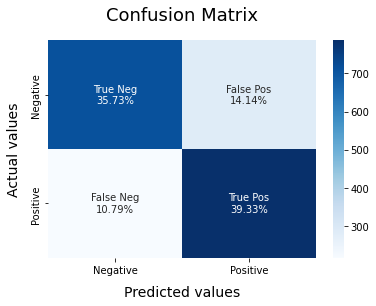

In [ ]:
model_evaluate(logistic)

NAIVE BAYES MODEL

In [ ]:
nb_classifier = BernoulliNB()
#Hyper parameter tuning for bernouli naive bayes
params_NB = { 'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   #number of cross-validation 
                 verbose=True, 
                 n_jobs=-1)
gs_NB.fit(X_train, y_train)
print('Best Parameters : ',gs_NB.best_params_)
gs_NB.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters :  {'alpha': 1.0}


{'alpha': 1.0}

In [ ]:
BNBmodel = BernoulliNB(alpha=1)
BNBmodel.fit(X_train, y_train)
 
y_predBNB = BNBmodel.predict(X_test)



In [ ]:
#Bernouli naive bayes
print(confusion_matrix(y_predBNB,y_test))
print(classification_report(y_predBNB,y_test))


[[661 348]
 [337 655]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1009
           1       0.65      0.66      0.66       992

    accuracy                           0.66      2001
   macro avg       0.66      0.66      0.66      2001
weighted avg       0.66      0.66      0.66      2001



In [ ]:
Naivetest = pd.DataFrame(list(zip((vectoriser.inverse_transform(X_test)) ,y_predBNB, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [ ]:
Naivetest

,TEST_TWEETS,PREDICTED,ORIGINAL
0,"[back, back to, good, im, now, now im, state, to]",0,1
1,"[hour, it, it only, maybe, maybe it, new, only...",0,0
2,"[delete, getting, haa, it, know, last, not, wh...",0,0
3,"[cant, cant wait, cant wait to, cd, different,...",0,0
4,"[have, have no, life, lol, no, no life, sadly]",0,0
...,...,...,...
1996,"[but, done, good, good thing, lot, not, thing,...",1,1
1997,"[course, cream, dinner, done, done with, ice, ...",1,1
1998,"[but, this, url, want]",0,0
1999,"[and, for, for me, great, me, with]",1,1


In [ ]:
X_train_new, y_train_new = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_train_new[:, 0].min()-1,stop = X_train_new[:, 0].max()+1,step=0.01),
                     np.arange(start = X_train_new[:, 1].min()-1,stop=X_train_new[:, 1].max()+1,step = 0.01)) #created a 2-Dimensional grid structure

In [ ]:
X2.shape

(1198, 710)

In [ ]:
X1.shape

(1198, 710)

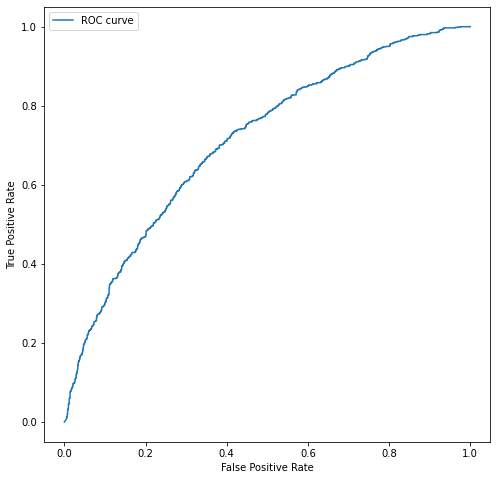

In [ ]:
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,BNBmodel.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

SVM

In [ ]:
hyper = {
       
     'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
     'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
      'kernel':['rbf','linear','poly']
        }
#Hyper parameter tunning for SVM
gdsvm=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, cv = 5, verbose=True, n_jobs=-1)

gdsvm.fit(X_train,y_train)
print(gdsvm.best_score_)
print(gdsvm.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.7183740535808868
SVC(C=1)


In [ ]:
"""
Fitting 3 folds for each of 2 candidates, totalling 6 fits

0.7261252883524593
SVC(kernel='linear')

0.7003755063250252
SVC(gamma=0.1)

0.7238757570907537
SVC(C=1)

"""

In [ ]:
clf = svm.SVC(kernel='linear',gamma=0.1,C=1) 
clf.fit(X_train, y_train)

y_predsvmgrid = clf.predict(X_test)
print(confusion_matrix(y_predsvmgrid,y_test))

[[706 219]
 [292 784]]


In [ ]:
print(classification_report(y_predsvmgrid,y_test))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       925
           1       0.78      0.73      0.75      1076

    accuracy                           0.74      2001
   macro avg       0.74      0.75      0.74      2001
weighted avg       0.75      0.74      0.74      2001



Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)
rfcparam_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rfcparam_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
clf = RandomForestClassifier(n_estimators = 500,max_features = 'auto', max_depth=8,criterion='gini') 
clf.fit(X_train, y_train)
y_predrfc = clf.predict(X_test)
#from sklearn import metrics 
#print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predrfc))

In [ ]:
print(classification_report(y_predrfc,y_test))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       967
           1       0.72      0.70      0.71      1034

    accuracy                           0.70      2001
   macro avg       0.70      0.70      0.70      2001
weighted avg       0.71      0.70      0.70      2001




Testing on random tweets


In [ ]:
tweet = 'These Russian have lost this war and they know it. Threatening with nuclear weapons is a sign of monumental failure and weakness.'
#tweet = 'This Maha Shivratri, may Lord Shiva destroy all your sorrows and eliminate all the troubles to help you lead a happy and healthy life. Help you become the force of Good '
vectTweet = vectoriser.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer
prediction = logistic.predict(vectTweet)  # predicts class of the

if(prediction[0] == 1):
  print('Tweet is positive')
else:
  print('Tweet is negative')


Tweet is negative
